## Reading shapefiles
Import the geopandas library and matplotlib for later use.

In [1]:
# Uncomment the following lines if you are
# setting up the environment for the first time
# (i.e. you have not run this notebook before)

# !pip install geopandas==0.12.2
# !pip install matplotlib==3.6.0

In [1]:
import matplotlib.pyplot as plt
import geopandas
import os

Use the `geopandas.read_file()` function to read the shapefile from disk. Geopandas will return a **GeoDataFrame** object which is similar to a pandas DataFrame.

In [2]:
# without using os, try doing the line below!
states = geopandas.read_file("../data/usa-states-census-2014.shp")

This returns a GeoDataFrame object which is similar to a pandas DataFrame. The GeoDataFrame has a `geometry` column which contains the geometry of each feature in the shapefile. In this case, each feature is a polygon representing a country. We can use the `head()` method to see the first few rows of the GeoDataFrame.

In [3]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


In [4]:
states = states.to_crs("EPSG:3395")

<AxesSubplot: >

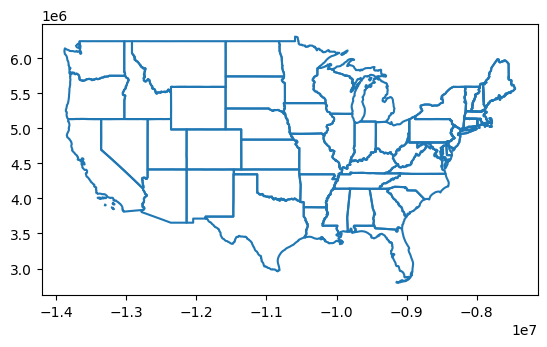

In [5]:
states.boundary.plot()

---

# Customizing the map

Below, we will customize the map to make it look nicer. We will:

- Add state boundaries,
- Add a title,
- Add colors to each state,
- States are labeled with the following:
    - State Name
    - Area using longitudinal offset
    - FIPS Code using longitudinal Offset

In [6]:
# Get the first state
tmpdf = states.iloc[0]
# Which state
print(tmpdf.NAME)
# Get the centroid coordinates
tmpdf.geometry.centroid.coords[0]

California


(-13322855.65488884, 4465905.292663826)

We can see below, we are adding the xy coordinates of first state, California. We add an offset to `xy` like so.

In [7]:
(tmpdf.geometry.centroid.coords[0][0], tmpdf.geometry.centroid.coords[0][1] - 55000)

(-13322855.65488884, 4410905.292663826)

Below, we use the `plot()` method to plot the shapefile. The `plot()` method is a wrapper around matplotlib's `plot()` function. We can pass arguments to the `plot()` method to customize the plot. For example, we can pass the `color` argument to set the color of the polygons.

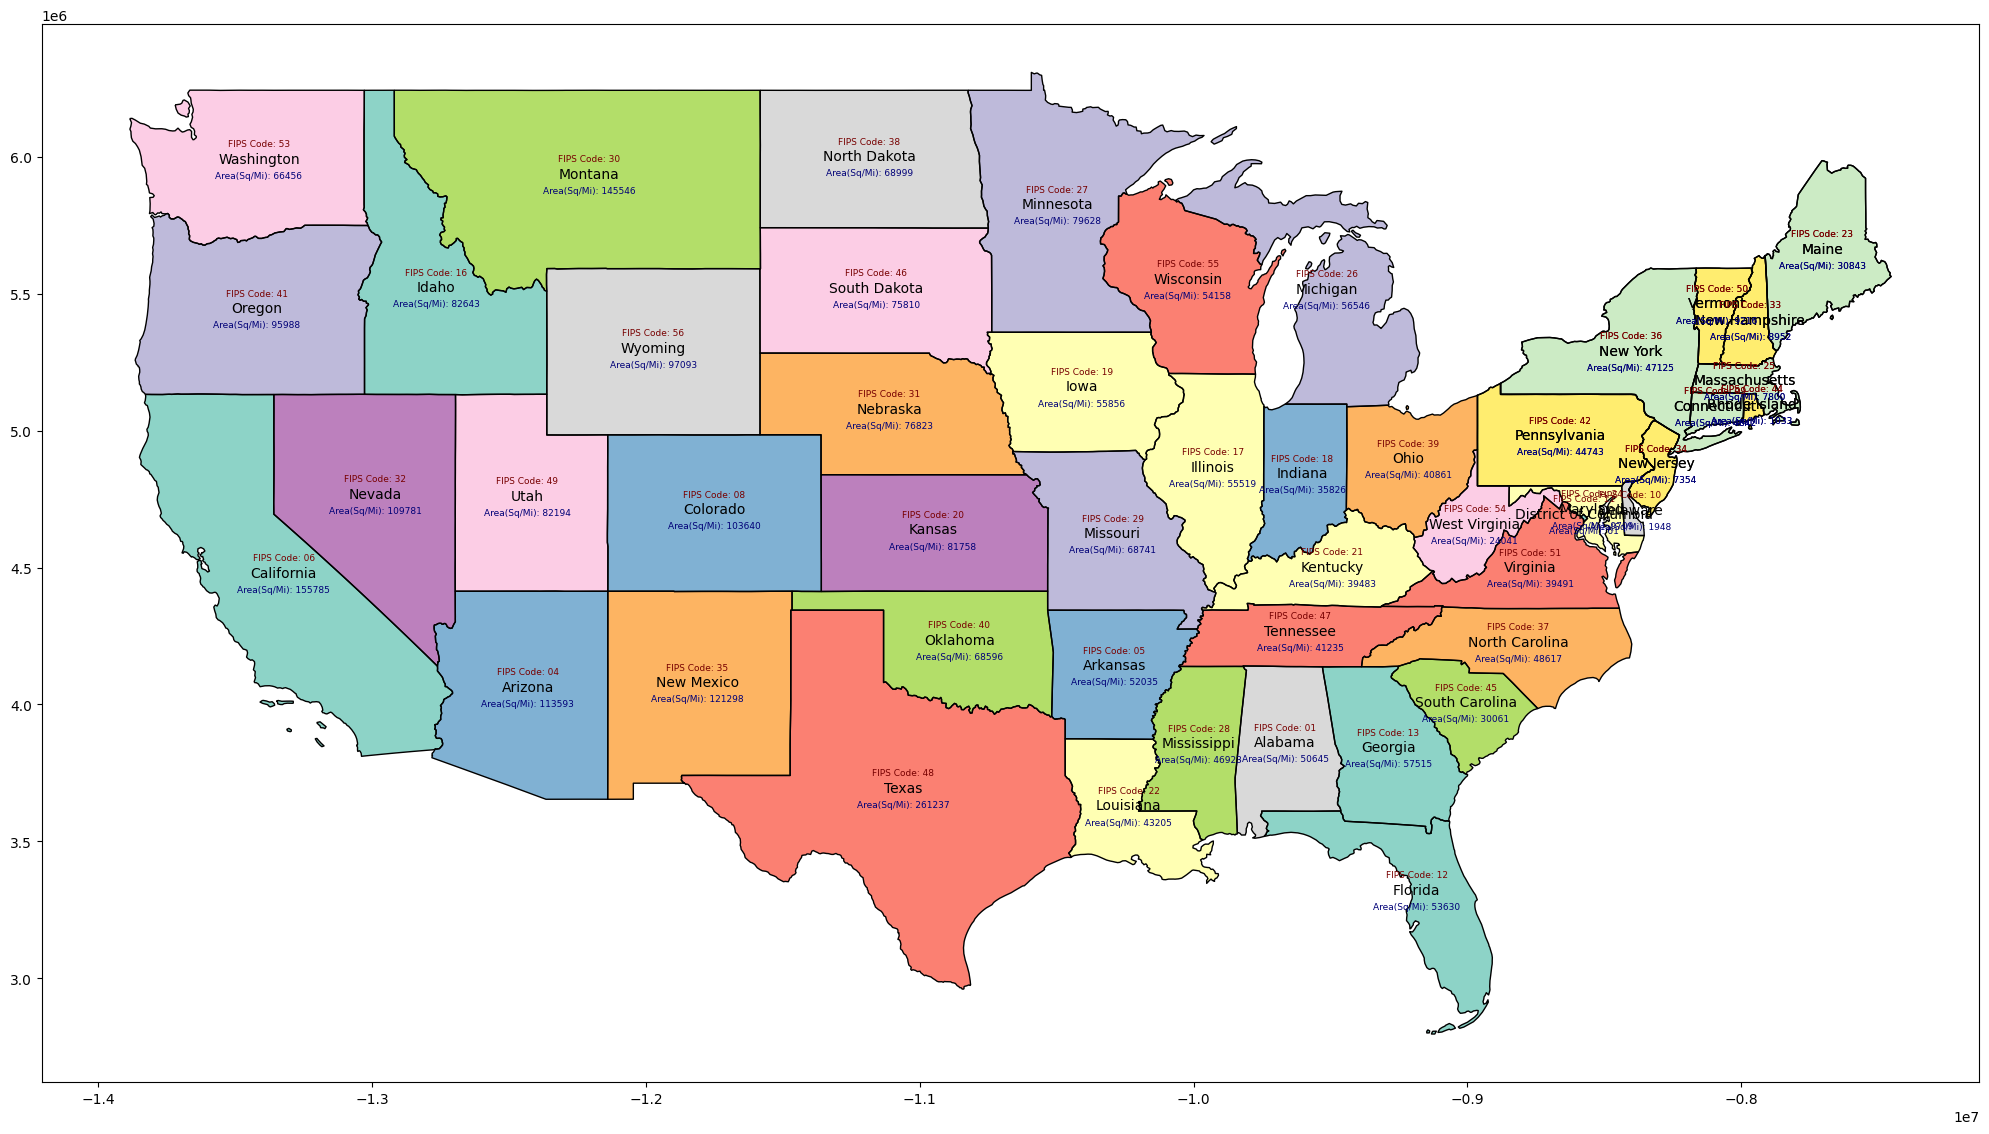

In [8]:
import math

fig = plt.figure(1, figsize=(25, 15))
ax = fig.add_subplot()

# Label 1: State Name
states.apply(
    lambda x: ax.annotate(
        text=x.NAME, xy=x.geometry.centroid.coords[0], ha="center", fontsize=10
    ),
    axis=1,
)

# Label 2: Area using longitudinal offset
states.apply(
    lambda x: ax.annotate(
        text=f"Area(Sq/Mi): {str(math.floor(x.ALAND / 2589988.1103))}",
        xy=(
            x.geometry.centroid.coords[0][0],
            x.geometry.centroid.coords[0][1] - 55000,
        ),
        ha="center",
        color="#000077",
        fontsize=6.5,
    ),
    axis=1,
)

# Label 3: FIPS Code using longitudinal Offset
states.apply(
    lambda x: ax.annotate(
        text=f"FIPS Code: {x.STATEFP}",
        xy=(
            x.geometry.centroid.coords[0][0],
            x.geometry.centroid.coords[0][1] + 60000,
        ),
        ha="center",
        color="#770000",
        fontsize=6.5,
    ),
    axis=1,
)


states.boundary.plot(ax=ax, color="Black", linewidth=1)

us_map = states.plot(ax=ax, cmap="Set3", figsize=(12, 9))

---

# Saving the map

We can save the map to disk using the `savefig()` method. However, first we need to trim the whitespace using `tight_layout()` method. We can pass arguments to the `savefig()` method to customize the plot. For example, we can pass the `dpi` argument to set the resolution of the image.

In [9]:
fig = us_map.get_figure()
fig.tight_layout()
if os.path.exists("../images/USA.png"):
    os.remove("../images/USA.png")
fig.savefig("../images/USA.png")


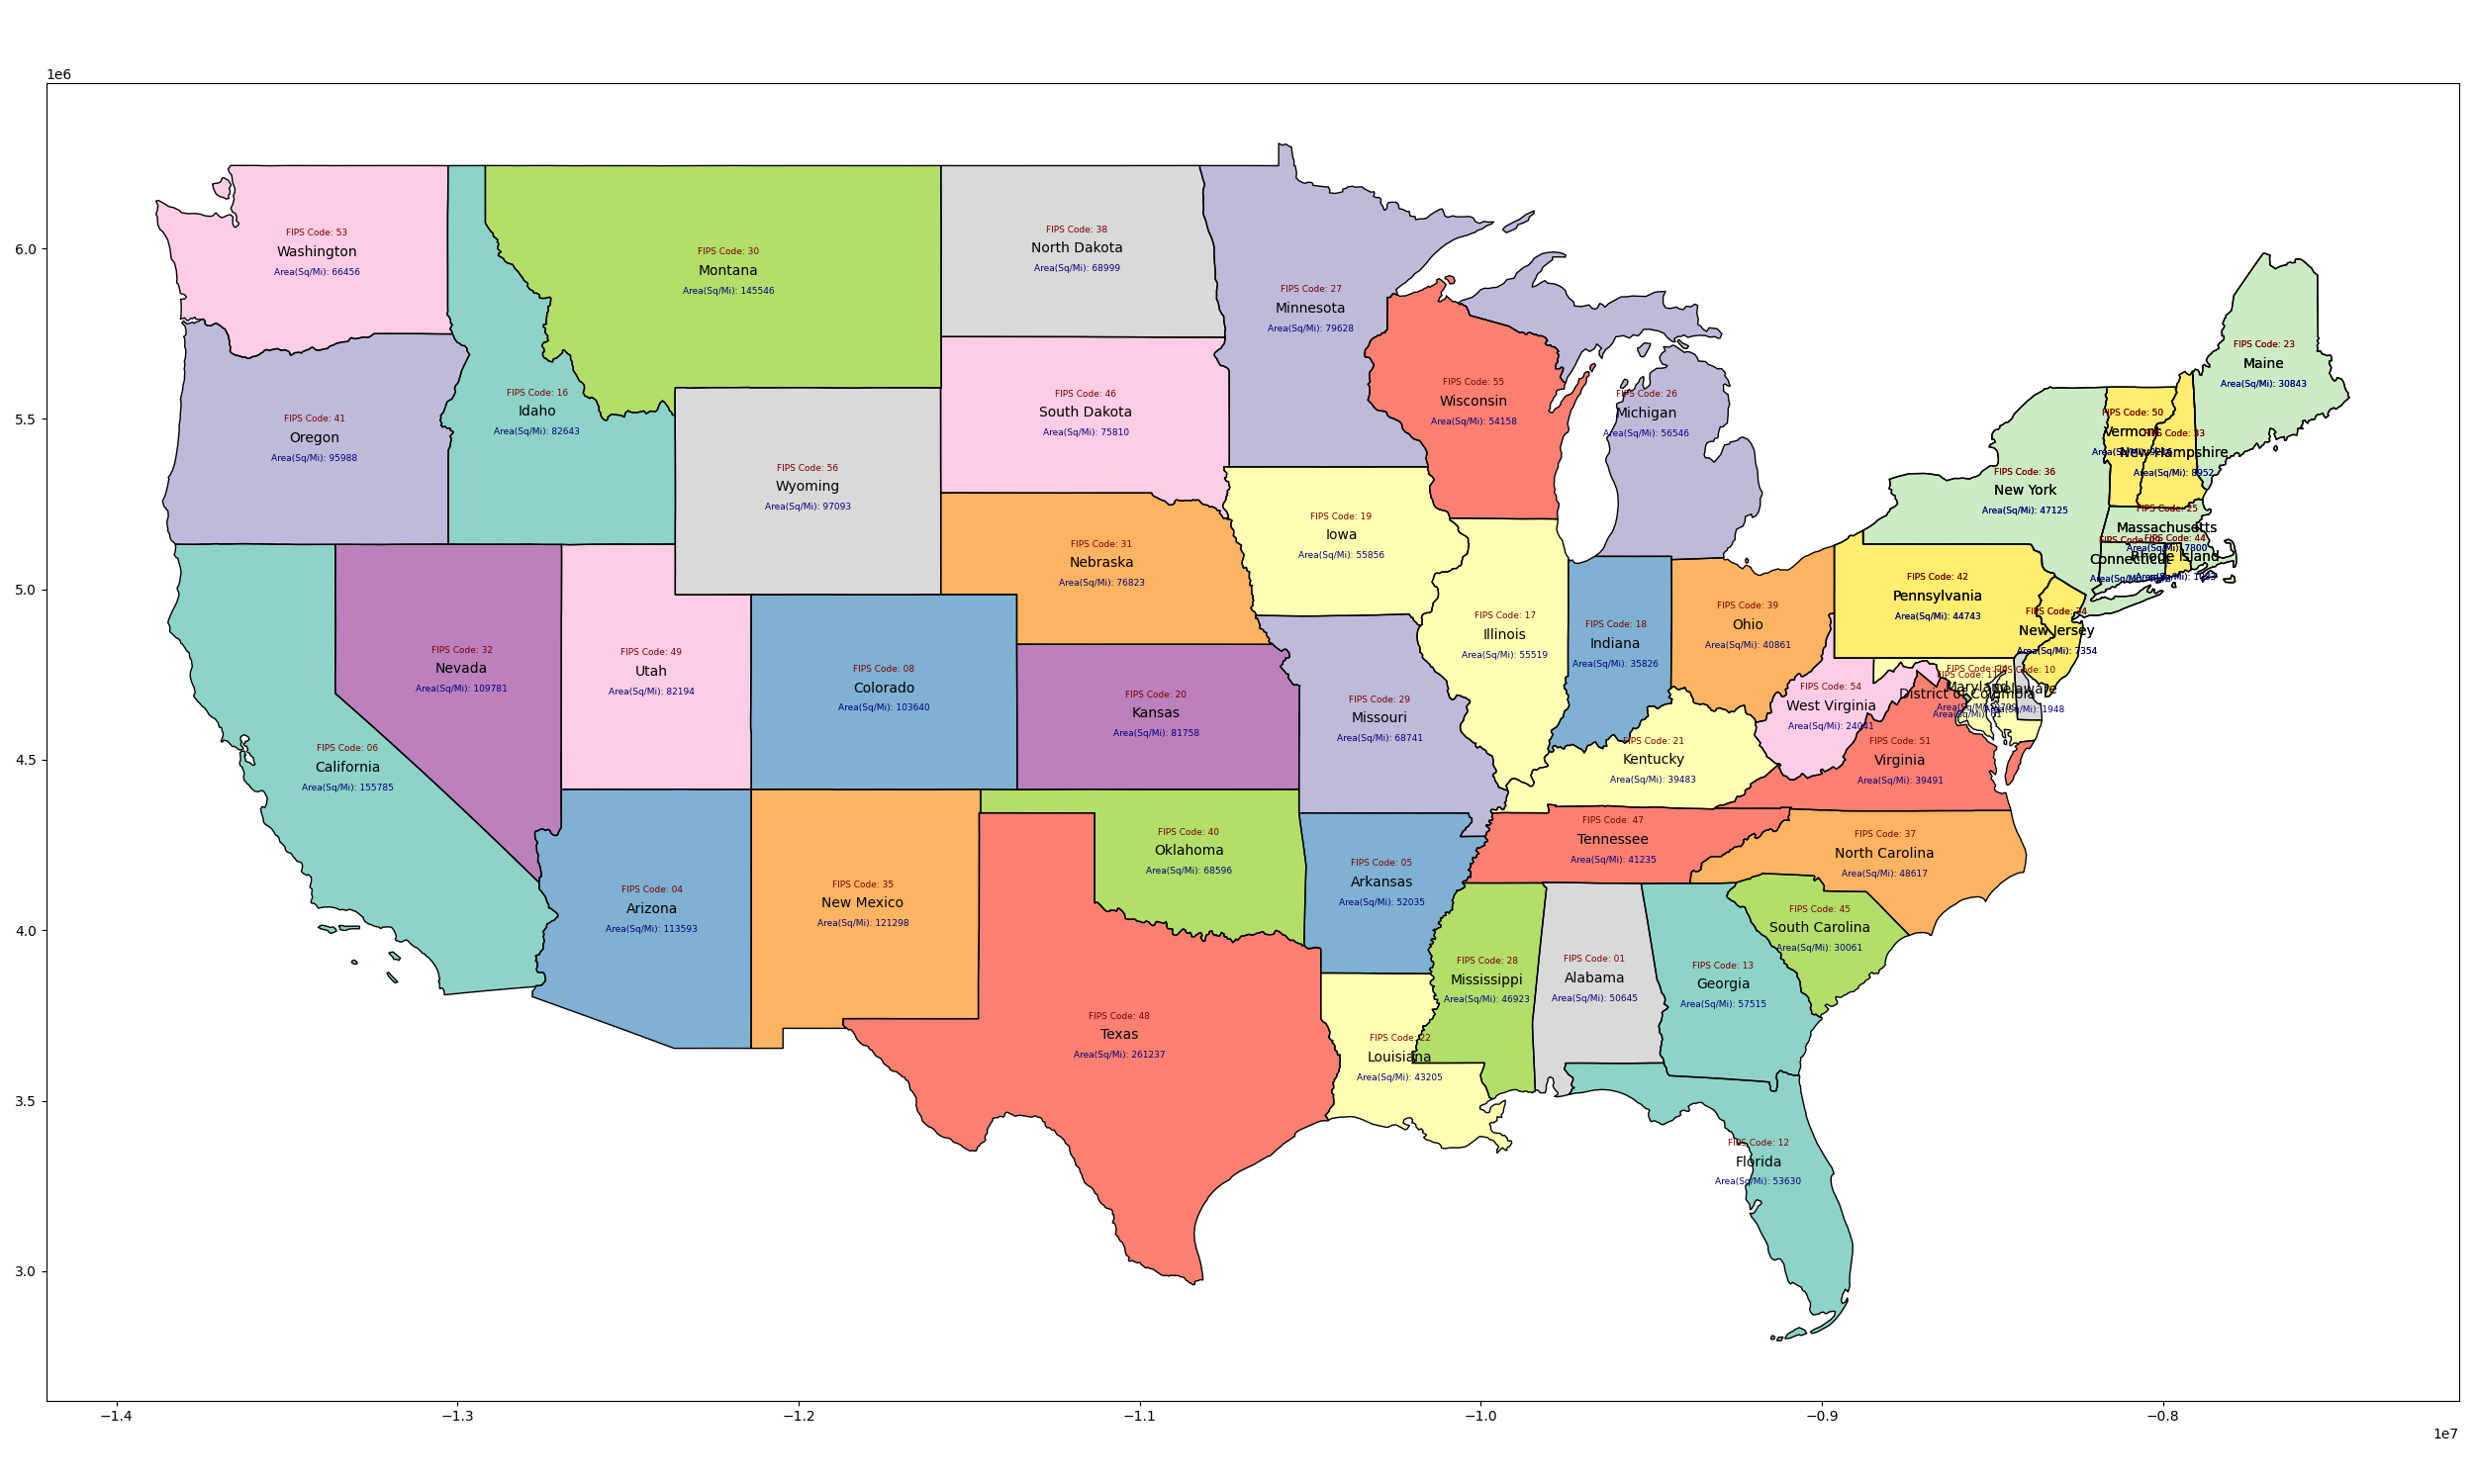

In [11]:
from IPython.display import Image
Image(filename="../images/USA.png")

# But wait, where's the counties?

We can see that the counties are not included in the shapefile. We can download the counties shapefile from the [US Census Bureau](https://public.opendatasoft.com/explore/dataset/us-county-boundaries/). We can use the `geopandas.read_file()` function to read the shapefile from disk. Geopandas will return a **GeoDataFrame** object which is similar to a pandas DataFrame.

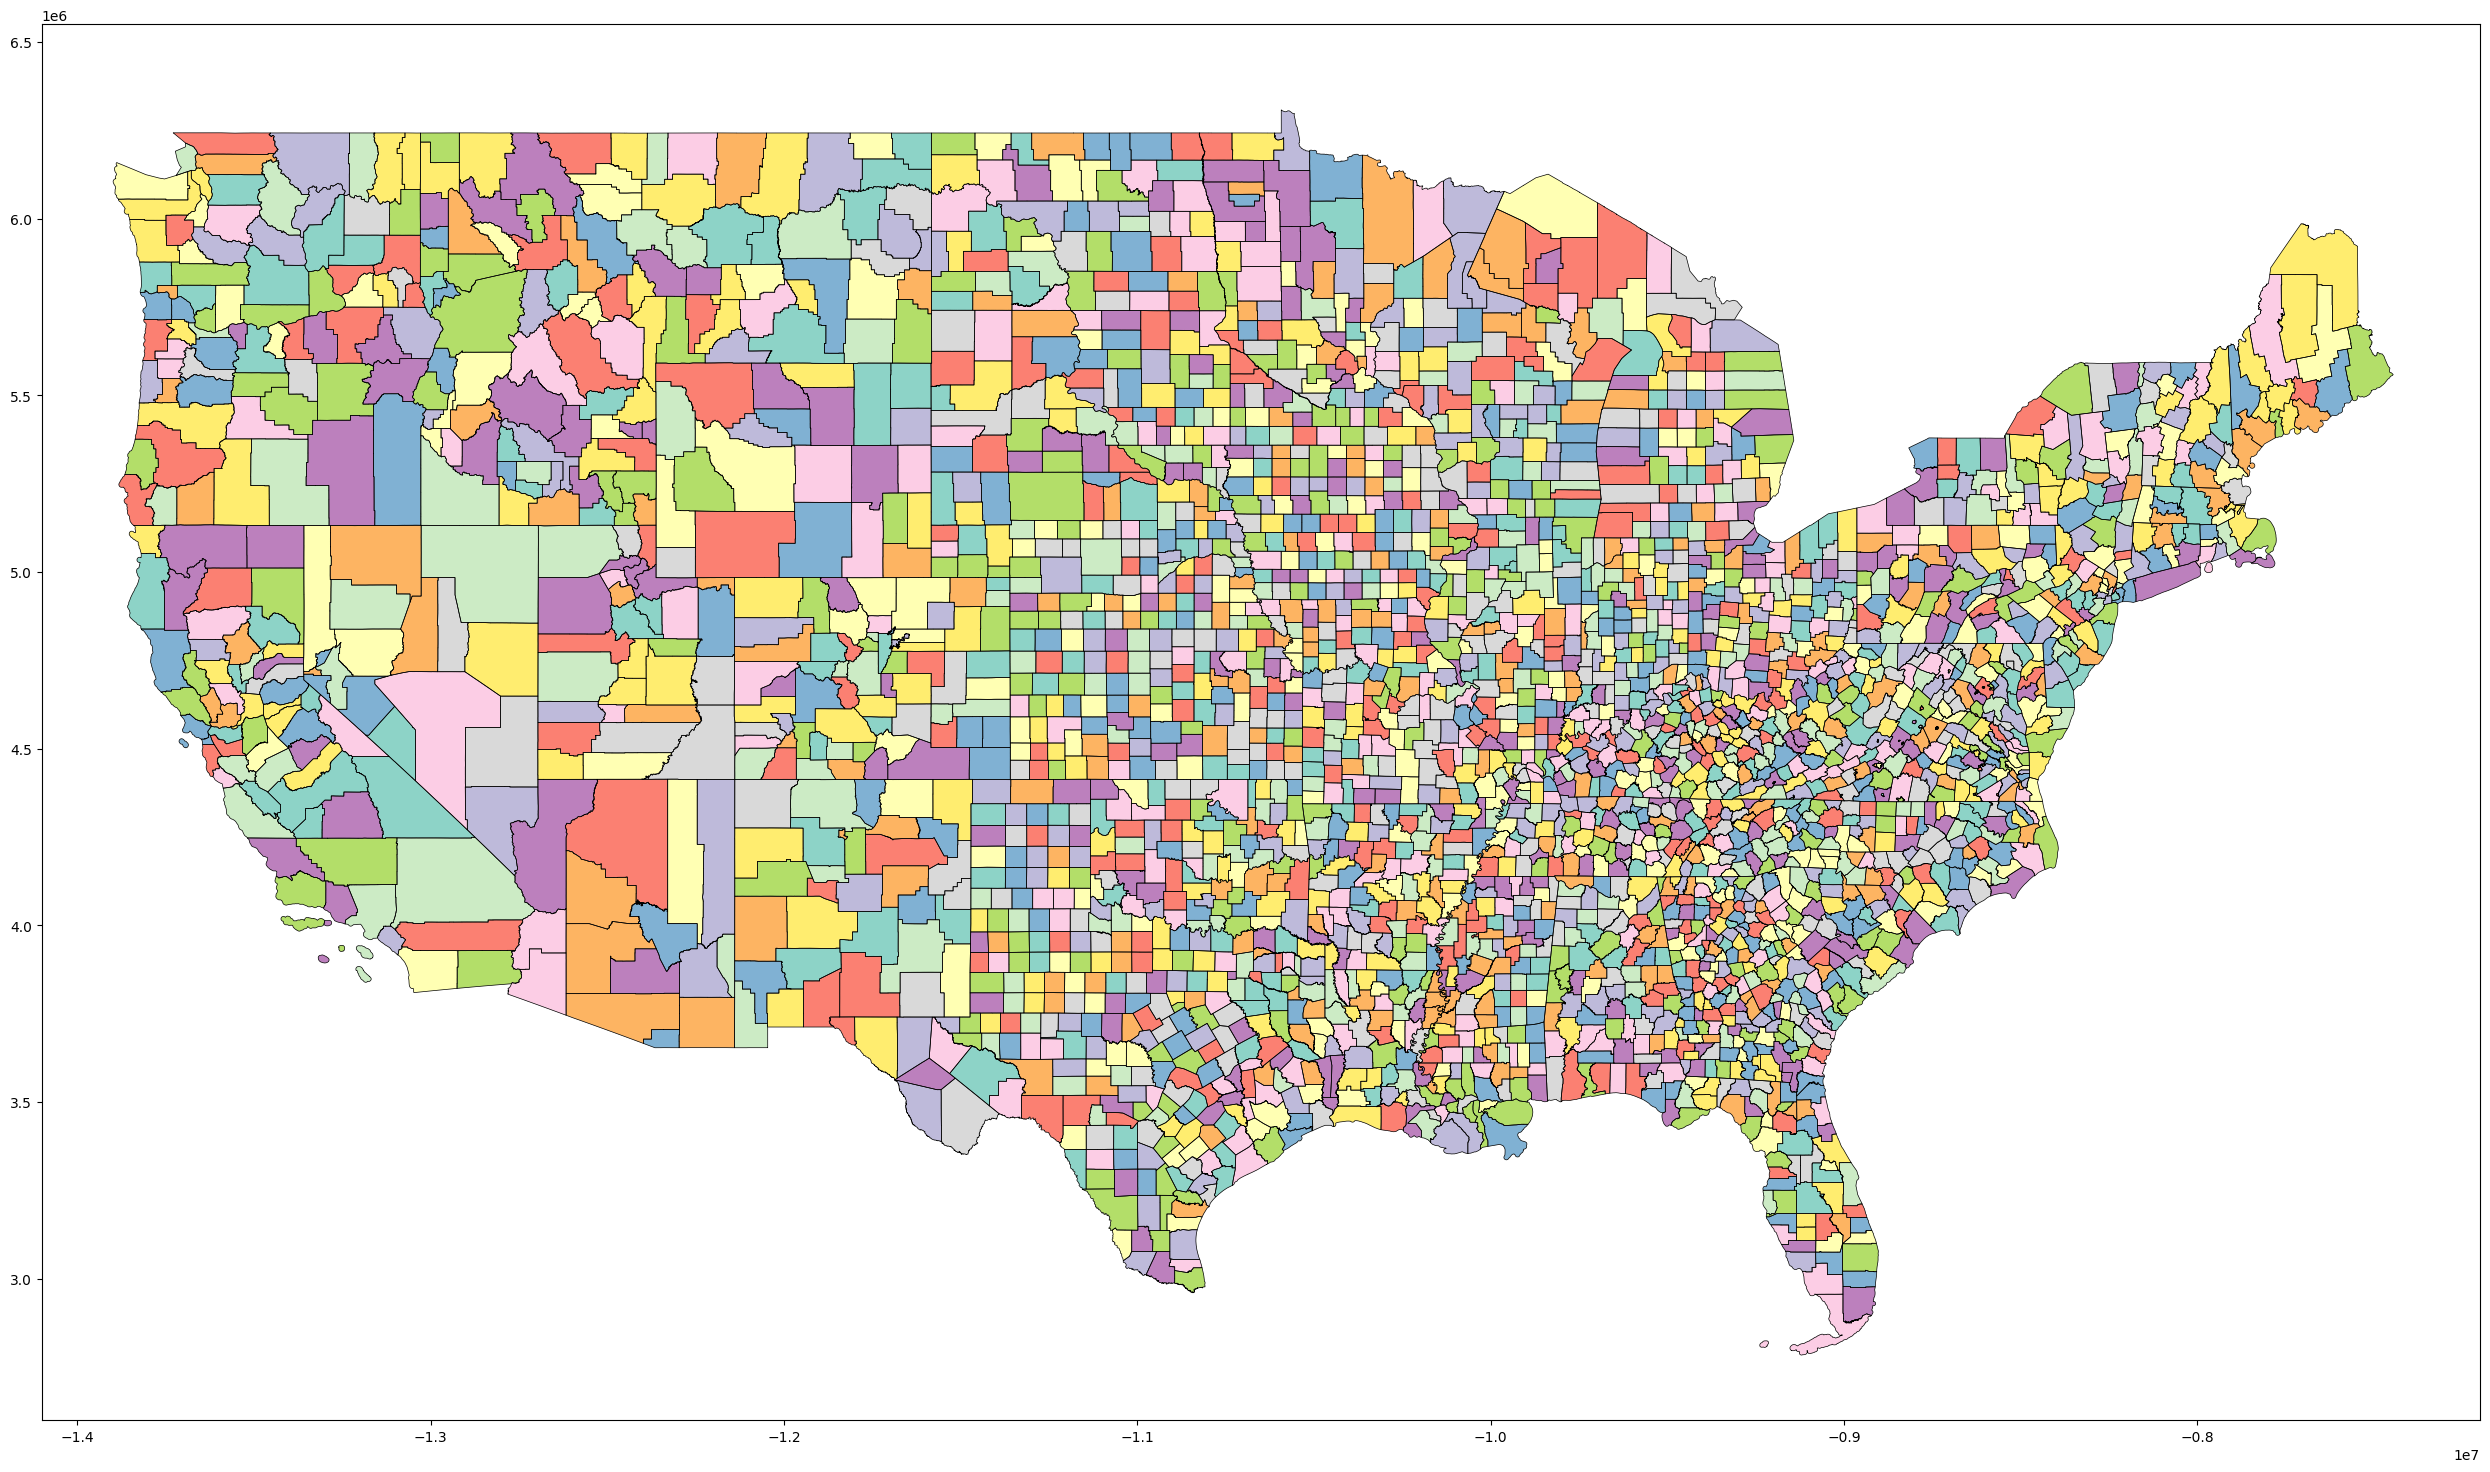

In [15]:
# Now we use https://public.opendatasoft.com/explore/dataset/us-county-boundaries/information/?disjunctive.statefp&disjunctive.countyfp&disjunctive.name&disjunctive.namelsad&disjunctive.stusab&disjunctive.state_name&lang=py&location=9,38.63189,-77.33139&basemap=jawg.light
# to get the county boundaries
counties = geopandas.read_file("../data/us-county-boundaries.geojson")
counties = counties.to_crs("EPSG:3395")

fig = plt.figure(1, figsize=(25, 15))
ax = fig.add_subplot()

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)

counties.boundary.plot(ax=ax, color="Black", linewidth=0.5)
us_map = counties.plot(ax=ax, cmap="Set3", figsize=(12, 9))

fig = us_map.get_figure()
fig.tight_layout()
if os.path.exists("../images/USA_counties.png"):
    os.remove("../images/USA_counties.png")
fig.savefig("../images/USA_counties.png") 
